# Лабораторная работа №1

## Предметная область, источник и характер данных
Был выбран датасет, который содержит в себе 2000 строк данных о домах с различными характеристиками, которые могут повлиять на цены на жилье. Данные являются реальными - рынки недвижимости, такие как рынки Сиднея и Мельбурна, предоставляют аналитикам данных интересную возможность для анализа и прогнозирования динамики цен на недвижимость. Датасет был взят с сайта https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset

## Описание атрибутов
- Площадь (area): площадь домов в наборе данных колеблется от 500 до 5000 квадратных футов, что позволяет проводить анализ по различным типам домов, от небольших квартир до более крупных роскошных домов.
- Спальни (bedrooms) и ванные комнаты (bathrooms): количество спален варьируется от 1 до 5, а ванных комнат - от 1 до 4. Это различие позволяет анализировать дома разных размеров и планировок.
- Этажи (floors): дома в наборе данных имеют от 1 до 3 этажей. Эта функция может быть полезна для определения влияния многоуровневых домов на цены на жилье.
- Год постройки (year built): набор данных содержит дома, построенные с 1900 по 2023 год, что позволяет проанализировать влияние нового и старого строительства на различные возрастные категории домов.
- Местоположение (location): в городе (urban), пригороде (suburban), в центре города (downtown) и сельской местности (rural). Цены на жилье в городах и в центре города могут быть выше из-за близости к объектам инфраструктуры.
- Состояние (condition): качество домов оценивается как "Отличное (excellent)", "Хорошее (good)", "Удовлетворительное (fair)" или "Плохое (poor)". Эта функция помогает моделировать разницу в ценах на основе текущего состояния дома.
- Гараж (garage): наличие гаража может увеличить цену за счет дополнительного удобства и пространства. Два значения: "да (yes)" или "нет (no)".
- Распределение цен (price): цены варьируются от 50 000 до 1 000 000 долларов, что позволяет оценить широкий спектр объектов недвижимости. Этот диапазон позволяет использовать набор данных для прогнозирования самых разных цен на жилье, от недорогих домов до элитной недвижимости.

## Анализ данных

Для начала выведем всю таблицу для наглядности. Далее будем работать только с числовыми значениями.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline

df = pd.read_csv("./house-price.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


### Нахождение СКО и среднего значения

In [40]:
attr = [df['Area'], df['Bedrooms'], df['Bathrooms'], df['Floors'], df['YearBuilt'], df['Price']]

for x in attr:
    print(f"\033[1m{x.name}")
    print(f"\033[0mСКО = {np.std(x)}")
    print(f"\033[0mСреднее = {np.mean(x)}")
    print("\n")

Area
СКО = 1294.8229715330792
Среднее = 2786.2095


Bedrooms
СКО = 1.4242498902931393
Среднее = 3.0035


Bathrooms
СКО = 1.1087126543879662
Среднее = 2.5525


Floors
СКО = 0.8089856302802827
Среднее = 1.9935


YearBuilt
СКО = 35.91771267773041
Среднее = 1961.446


Price
СКО = 276359.72986714804
Среднее = 537676.855




### Построение гистограмм и определение вбросов

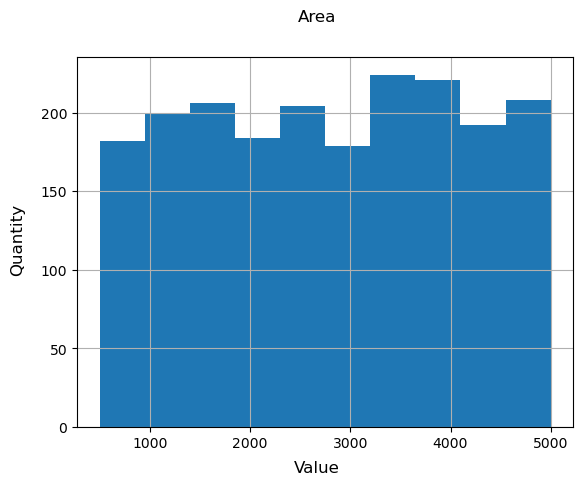

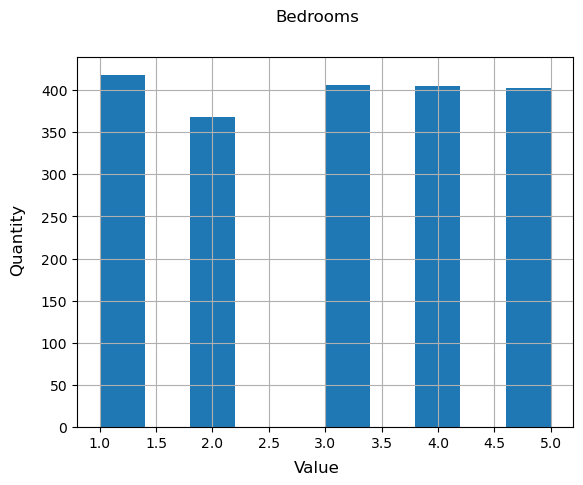

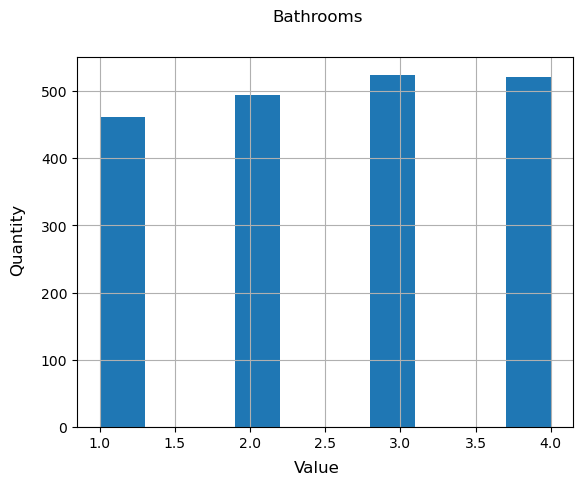

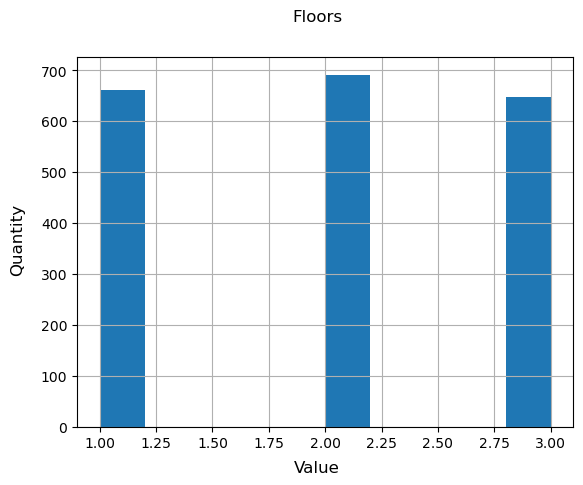

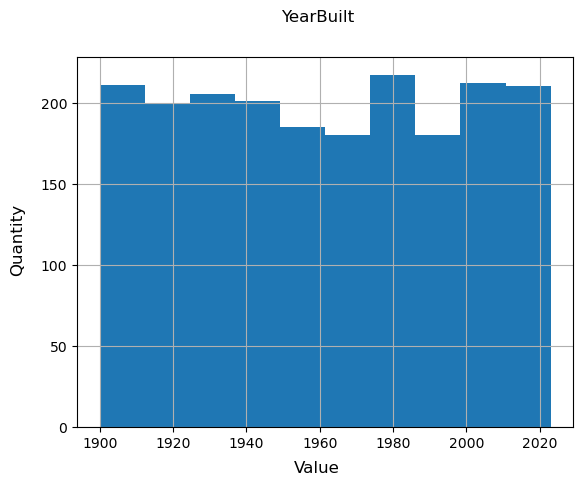

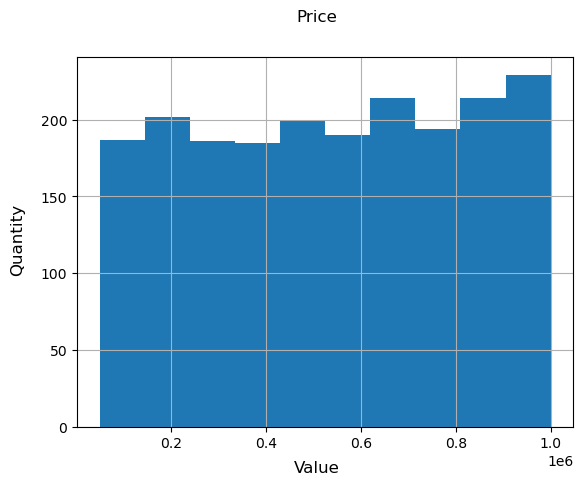

In [42]:
for x in attr:
    fig = plt.figure()
    fig.suptitle(x.name)
    fig.supxlabel("Value")
    fig.supylabel("Quantity")
    x.hist()

Определим выбросы:

In [66]:
df_no_id = df.drop(columns=['Id'])
for col in df_no_id.select_dtypes(include=['number']).columns:
    Q1 = df_no_id[col].quantile(0.25)
    Q3 = df_no_id[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df_no_id[(df_no_id[col] < lower_bound) | (df_no_id[col] > upper_bound)][col].count()
    print(f"Колонка {col} - {outliers_count} выбросов")

Колонка Area - 0 выбросов
Колонка Bedrooms - 0 выбросов
Колонка Bathrooms - 0 выбросов
Колонка Floors - 0 выбросов
Колонка YearBuilt - 0 выбросов
Колонка Price - 0 выбросов


Выбросов нет

Далее проверим датасет на пропущенные значения (пропущенных значений нет):

In [64]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

### Определение корреляции между параметрами

Построим матрицу графиков рассеивания:

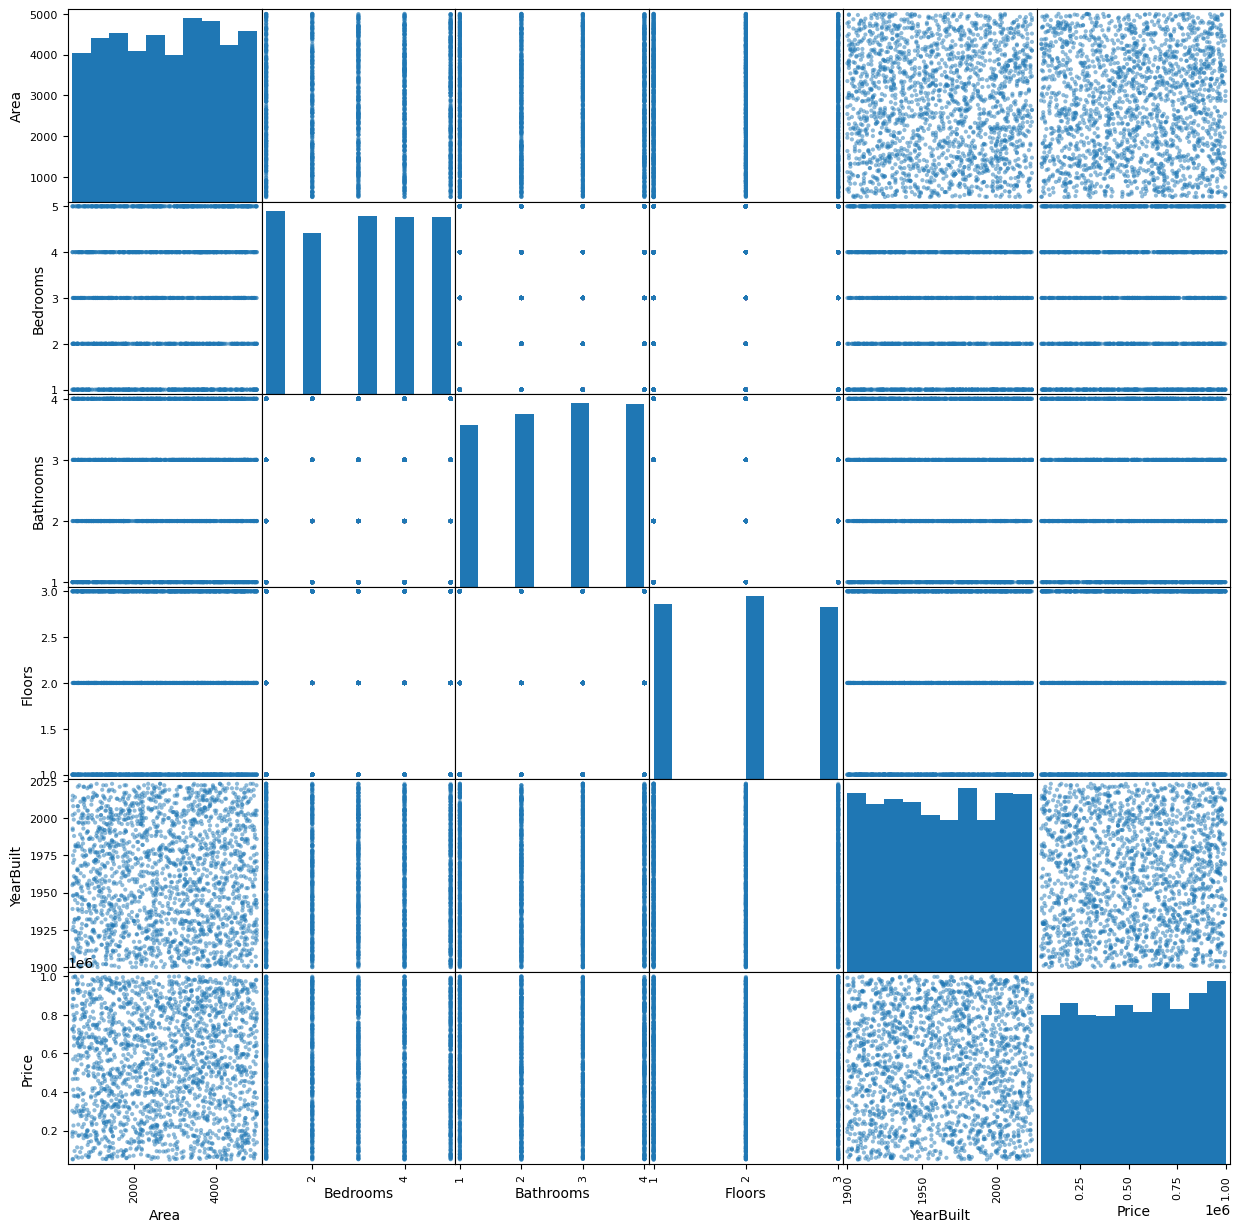

In [75]:
df_no_id = df.drop(columns=['Id'])
frame = pd.DataFrame(df_no_id.select_dtypes(include=['number']))
scatter_matrix = pd.plotting.scatter_matrix(frame, figsize=(15, 15) )

Для дальнейшего анализа построим матрицу корреляций:

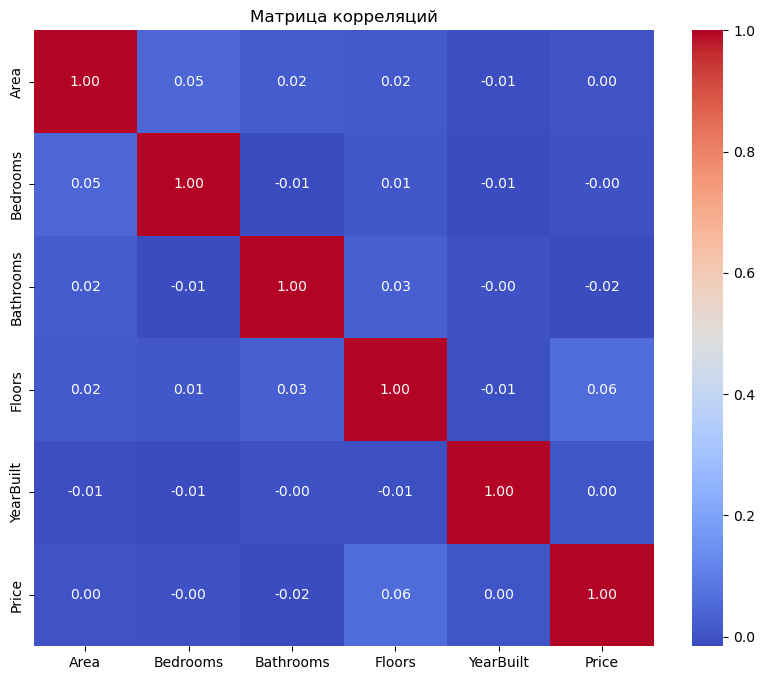

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Area': df['Area'],
    'Bedrooms': df['Bedrooms'],
    'Bathrooms': df['Bathrooms'],
    'Floors': df['Floors'],
    'YearBuilt': df['YearBuilt'],
    'Price': df['Price']
}

df = pd.DataFrame(data)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Матрица корреляций')
plt.show()


Проанализируем данные с помощью построенной матрицы:

В целом, между любыми двумя элементами в данном датасете корреляция отсутствует (меньше 0.1 по модулю). Поэтому можно сделать вывод, что каждый параметр не зависит от других, является самостоятельным, что и впринципе логично, учитывая специфику датасета.